# <center> ONLINE SHOPPING INTENTION ANALYSIS</center>

### This project is about analysing online shopping intention from the customer specific website statistics. The idea is to create a new strategy or change existing strategy to ensure more customers buy products when they visit the website 

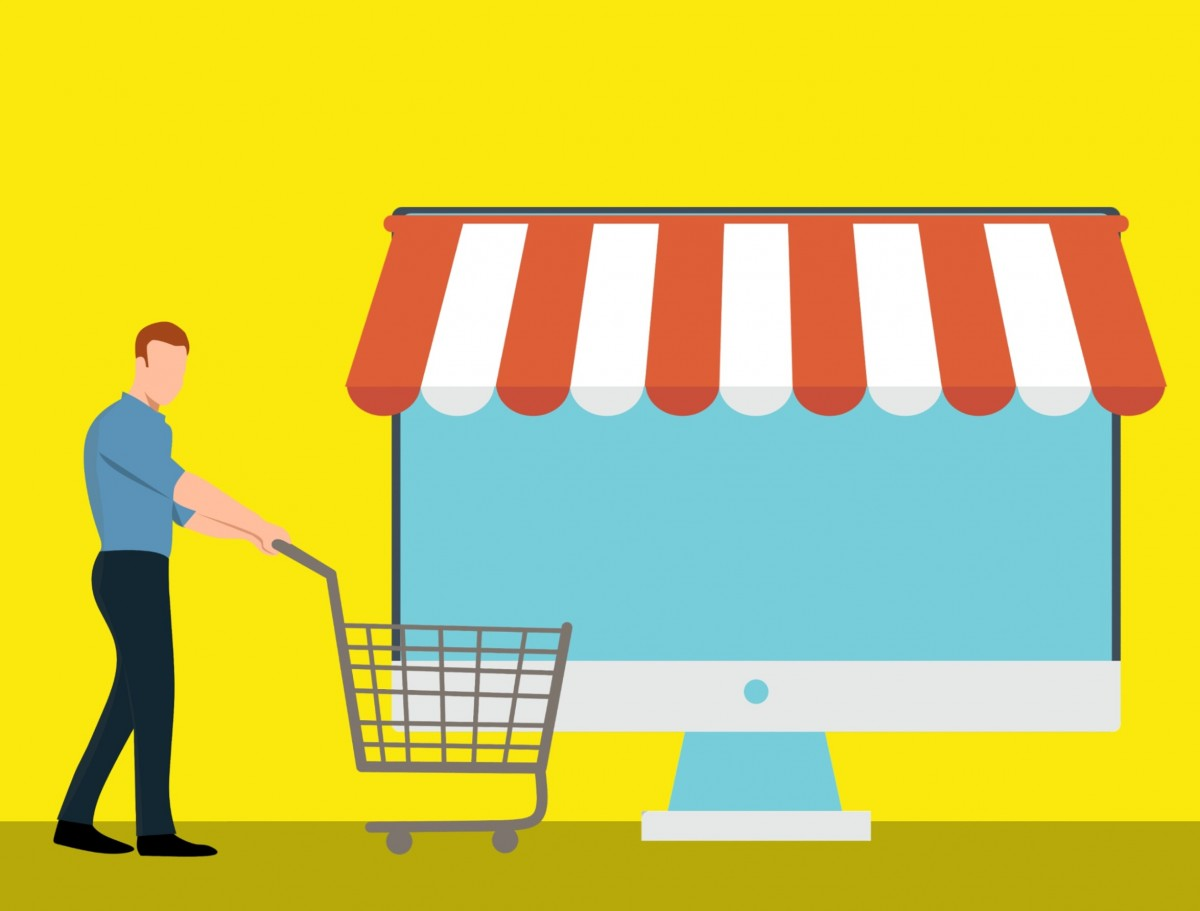

### Importing major libraries

In [78]:
# data processing libraries
import pandas as pd
import numpy as np


# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Configure visualisations%matplotlib inline
plt.style.use('fivethirtyeight')

#Modeling
from sklearn.cluster import KMeans

#Preprocessing
from sklearn.preprocessing import LabelEncoder

#Evaluation metrics
from sklearn.metrics import adjusted_rand_score, confusion_matrix, plot_confusion_matrix

In [3]:
data=pd.read_csv('online_shoppers_intention.csv')
print(data.shape)
data.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**As seen above data has 18 features. This is an unsupervised algorithm hence the idea to segment customers based on their website statistics**

### Data Preprocessing and EDA

In [24]:
# checking data type and info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [25]:
# let's check null values
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

**There are some null values, we will simply fill them with 0 at the moment**

In [28]:
data=data.fillna(0)

In [29]:
# Let us focus on few important features for now which are "BounceRates" and "ProductRelated_Duration"
x=data.iloc[:, [5,6]]
x.head()

,ProductRelated_Duration,BounceRates
0,0.000000,0.20
1,64.000000,0.00
2,-1.000000,0.20
3,2.666667,0.05
4,627.500000,0.02


In [30]:
#checking the shape of the new data
x.shape

(12330, 2)

## K Means clustering

**we need to decide how many clusters are the best, we can do so by simply using elbow method**

In [44]:
total_inertia=[]

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(x)
    labels=km.labels_
    total_inertia.append(km.inertia_)    
    

In [45]:
total_inertia

[45152288642.74862,
 20931681307.701843,
 12614148792.822435,
 8248523285.333737,
 5462934361.851206,
 3848356381.332654,
 2767889756.389859,
 2052424821.189708,
 1581904797.48231,
 1367288552.7410324]

Text(0, 0.5, 'Inertia')

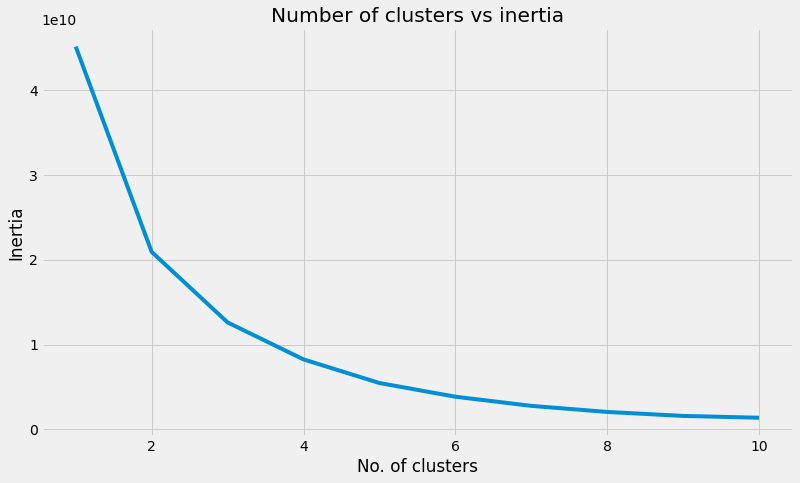

In [48]:
# Let's plot the results to check how many clusters are the best

plt.figure(figsize=(12,7))

plt.plot(range(1,11),total_inertia)

plt.title('Number of clusters vs inertia')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')


**As seen above we will choose 2 clusters to segment the above dataset**

In [49]:
km=KMeans(n_clusters=2)
y_means=km.fit_predict(x)

In [52]:
y_means[y_means==0].shape

(937,)

In [53]:
y_means[y_means==1].shape

(11393,)

In [54]:
x.head()

,ProductRelated_Duration,BounceRates
0,0.000000,0.20
1,64.000000,0.00
2,-1.000000,0.20
3,2.666667,0.05
4,627.500000,0.02


In [59]:
x.iloc[y_means==0, 0].shape

(937,)

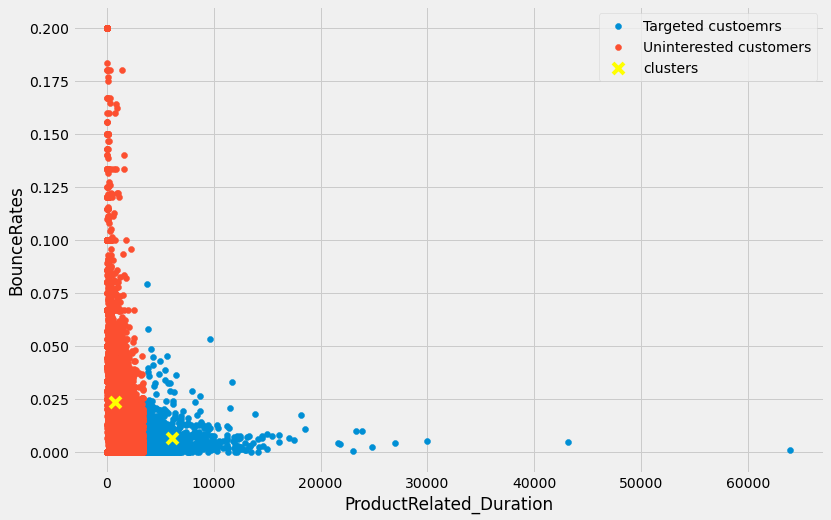

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(x.iloc[y_means==0,0], x.iloc[y_means==0, 1], label='Targeted custoemrs')
plt.scatter(x.iloc[y_means==1,0], x.iloc[y_means==1, 1], label='Uninterested customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], label='clusters', marker='x',c='yellow',s=120)
plt.legend(loc='best')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.show()

**It is clear that customers who spent more time are very less likely to leave the website**

#### Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers)

In [95]:
data['Revenue']

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

In [113]:

y_true=data['Revenue'].map({False:0, True:1})
y_pred=y_means^1

score=adjusted_rand_score(y_true, y_pred)
print("Adjusted rand index", score)


Adjusted rand index 0.08344649929017146


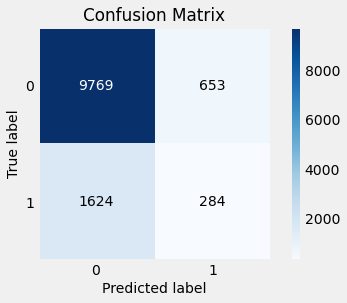

In [114]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)

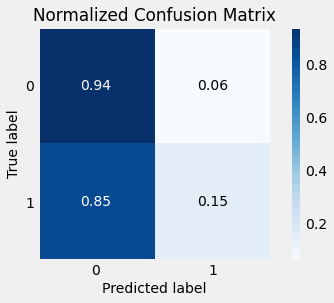

In [115]:
skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)

## True label 0 means "Targeted customers" and Revenue 1 means customer bought something.

In [101]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

## Observations

**From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high**